# [MO443] Trabalho de Esteganografia - Trabalho 01

> Trabalho realizado por Maria Angélica Krüger Miranda {197698}
>
> **Objetivo:** Aplicar a transformada rápida de Fourier (FFT) em imagens digitais, explorando o processamento no domínio da frequência.

## Introdução

Trabalhar com imagens digitais envolve inúmeros processos e conceitos importantes. Um destes processos diz respeito ao melhoramento de aspectos visuais, desde o tratamento de ruídos até técnicas para destacar pontos de interesse na imagem. Uma abordagem muito utilizada para ressaltar estas regiões é a filtragem, podendo ser realizada tanto no domínio espacial quanto no de frequência. Outra ferramenta muito utilizada neste meio é a compressão de imagens, principalmente para que a mesma ocupe um espaço de armazenamento menor, tendo em vista que a quantidade de pixels em uma imagem junto com a quantidade de bandas presentes pode ser demasiadamente elevada. 

Desta forma, este trabalho pretende explorar os conceitos de filtragem no domínio da frequência e de compressão. Para o primero será efetuado a aplicação de diversos filtros para entender a proposta de cada um. Já o segundo conceito, será efetuada uma técnica de compressão mais simples no domínio da frequência, cuja análise será realizada por meio do histograma.

### Filtragem no Domínio da Frequência

A filtragem tem como objetivo melhorar a qualidade da imagem através da ampliação do seu contraste, eliminação de ruído e melhorar o foco e acentuação de característica em imagens. Esta filtragem pode ser realizada tanto no domínio espacial quanto no de frequência. Neste trabalho o foco será no domínio de frequência, porém o efeito do filtro no domínio espacial é bem similar.

Dada uma imagem digital, o primerio procedimento da filtragem consistirá converter a imagem do domínio espacial para o de frequência. Este processo é realizado por meio da transformada de Fourier. Em seguida é realizada o processamento desejado e por fim, deve-se converter novamente para o domínio espacial para analisar o resultado obtido. Os filtros que serão explorados são o de passa-baixa, passa-alta, passa-faixa e rejeita-faixa.

Para entender melhor estes procedimentos, vamos iniciar com a importação das bibliotecas necessárias juntamente com a criação de funções que auxiliarão na visualização das imagens ao longo do trabalho. As células seguinte realizam tais procedimentos.


In [1]:
# Importações das bibliotecas
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Funções de auxílio para visualização das imagens
def mostrar_imagem(imagem, titulo, colorMap = None):
    if colorMap is not None:
        plt.imshow(imagem, cmap=colorMap)
    else:
        plt.imshow(imagem)
    plt.title(titulo)
    plt.show()
    
def produzir_subimagem(subimagem, i, j, imagem, color_map = None, titulo = None):
    if i == 1:
        subimagem[j].imshow(imagem, cmap=color_map)
        subimagem[j].set_title(titulo)
        subimagem[j].axis('off')
    else:
        if color_map is None:
            subimagem[i][j].imshow(imagem)
        else:
            subimagem[i][j].imshow(imagem, cmap=color_map)
        subimagem[i][j].set_title(titulo)
        subimagem[i][j].axis('off')

Após o carregamento da imagem ao programa e sua conversão para a escala de cinza por meio das funções ``imread`` da biblioteca **OpenCV**, será necessário aplicar a transformada de Fourier na imagem para que a mesma seja levada para o domínio da frequência. Este procedimento foi realizado por meio da função ```fft.fft2``` seguida de um deslocamento do resultado para o centro por meio da função ```fft.fftshift```. Este novo domínio é composto por números complexos e a imagem resultante apresenta dois componentes, a magnitude e a fase. A aplicação dos filtros será feita na magnitude, sendo assim, para obtê-la basta aplicar módulo nos valores resultantes da transformada (vale lembra que o módulo de um número complexo sempre resutlará num valor real) seguido do log. Além disso, deve-se somar uma unidade para evitar o $log(0)$. A linha 7 da célula abaixo realiza este procedimento de obtenção da magnitude da imagem. 

A célula abaixo realiza o processo de obtenção da transformada rápida de Fourier, obtenção da amplitude da imagem transformada seguida da operação inversa. Além disso é mostrado como a imagem fica no domínio de frequência e o resultado após aplicar a inversa, cujo resultado deve ser igual a imagem de entrada.

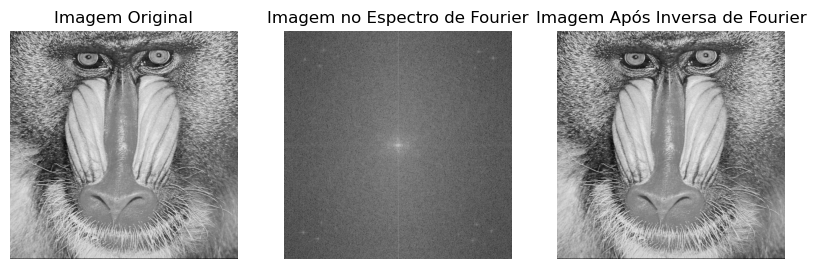

In [3]:
# Ler imagem e deixá-la em escala de cinza - imagem de tamanho 512x512
imagem = cv2.imread('baboon.png', cv2.IMREAD_GRAYSCALE) 

# Aplicar a FFT na imagem e centralizar o espectro de frequência
imagemEspectroFourier = np.fft.fftshift(np.fft.fft2(imagem))
magnitudeImagem = np.log(np.abs(imagemEspectroFourier)+1) # soma 1 para evitar log(0)

# Aplicar a inversa de Fourier
imagemInversa = np.abs(np.fft.ifft2(np.fft.ifftshift(imagemEspectroFourier)))

# Visualizar o espectro de frequência
fig, subimagem = plt.subplots(1, 3, figsize=(10, 10))
produzir_subimagem(subimagem, 1, 0, imagem, 'gray', 'Imagem Original')
produzir_subimagem(subimagem, 1, 1, magnitudeImagem, 'gray', 'Imagem no Espectro de Fourier')
produzir_subimagem(subimagem, 1, 2, imagemInversa, 'gray', 'Imagem Após Inversa de Fourier')

Será aplicado quatro diferentes filtros, cuja definição, montagem da máscara e efeito obtido estão explicados abaixo:

- **Filtro passa-baixa**: É realizado uma atenuação nas altas frequências que estão presentes em regiões de transições (bordas, por exemplo). A construção deste filtro foi realizado por meio de uma matriz de zeros com círculo de tamanho $r$ com coeficientes unitários. O efeito obtido após a sua aplicação é de suavização das bordas juntamente com um borramento, além disso, este filtro permite minimizar efeitos de ruído presentes na imagem.
- **Filtro passa-alta**: É realizado uma ateanuação nas baixas frequências, regiões homogêneas, ocasionando um realce maior em bordas e linhas. A construção deste filtro foi realizado por meio de uma matriz unitária com um círculo de tamanho $r$ com coeficientes nulos, basicamente é o inverso do filtro anterior. O efeito obtido na imagem é a enfatização nas bordas, porém um efeito indesejado é o destacamento nos ruídos presentes.
- **Filtro passa-faixa**: É escolhido uma faixa de frequências que o filtro deixará passar enquanto os demais serão atenuados. A montagem deste filtro é realizado por meio de dois círculos que selecionarão as frequências desejadas. 
- **Filtro rejeita-faixa**: Este filtro realiza o processo inverso do passa-faixa, aqui é escolhido as faixas que serão rejeitadas pelo filtro. A montagem da máscara deste filtro é o mesmo do anterior tendo uma inversão dos valores dos coeficientes.

A célula abaixo mostra a montagem das máscaras para cada filtro seguida da visualização de cada um para melhor entendimento.

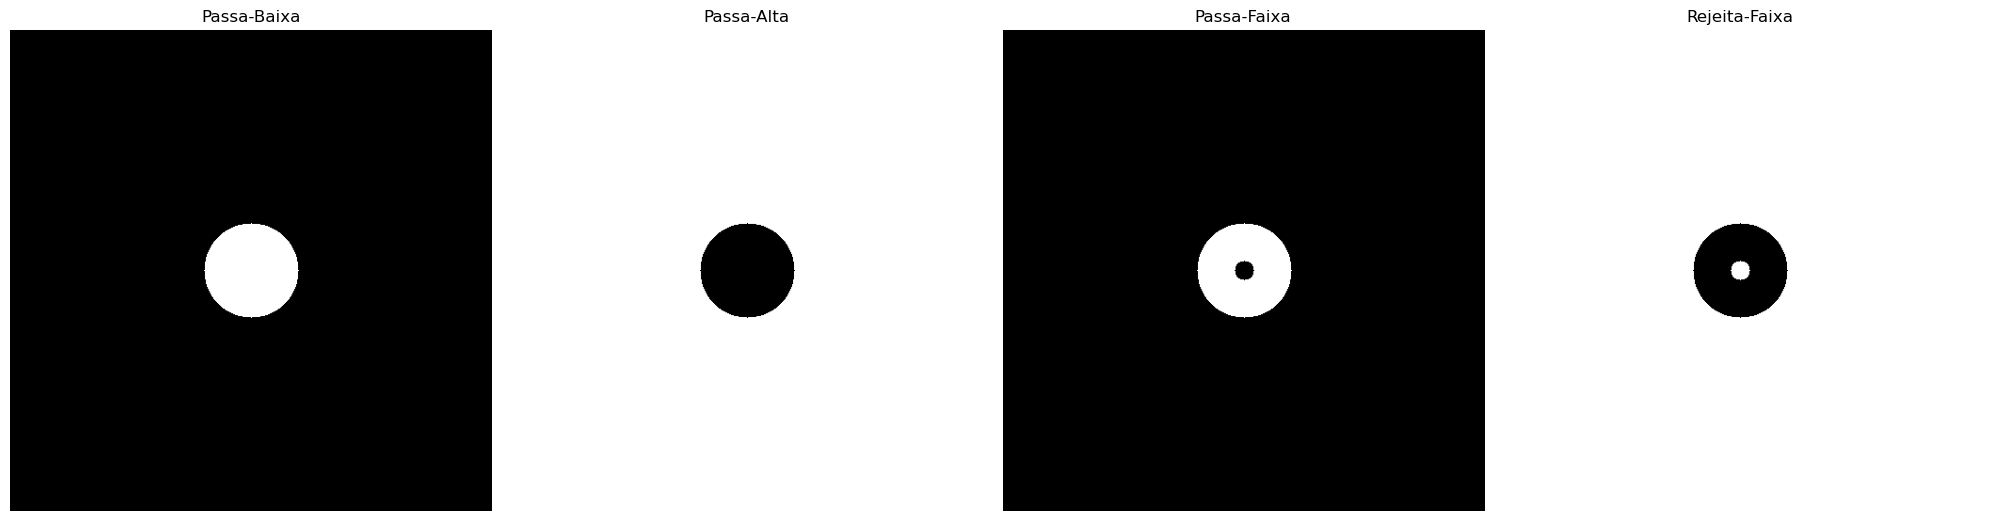

In [4]:
# Criação das máscaras para os diferentes filtros

raio = 50
raioInterno = 10

# Máscara passa-baixa
mascaraPassaBaixa = np.zeros(imagem.shape)
cv2.circle(mascaraPassaBaixa, (imagem.shape[0]//2, imagem.shape[1]//2), raio, 1, -1)

# Máscara passa-alta
mascaraPassaAlta = np.ones(imagem.shape)
cv2.circle(mascaraPassaAlta, (imagem.shape[0]//2, imagem.shape[1]//2), raio, 0, -1)

# Máscara passa-faixa
mascaraPassaFaixa = np.zeros(imagem.shape)
cv2.circle(mascaraPassaFaixa, (imagem.shape[0]//2, imagem.shape[1]//2), raio, 1, -1)
cv2.circle(mascaraPassaFaixa, (imagem.shape[0]//2, imagem.shape[1]//2), raioInterno, 0, -1) 

# Máscara rejeita-faixa
mascaraRejeitaFaixa = np.ones(imagem.shape)
cv2.circle(mascaraRejeitaFaixa, (imagem.shape[0]//2, imagem.shape[1]//2), raio, 0, -1)
cv2.circle(mascaraRejeitaFaixa, (imagem.shape[0]//2, imagem.shape[1]//2), raioInterno, 1, -1)

# Visualização das máscaras
fig, subimagem = plt.subplots(1, 4, figsize=(20, 20))
produzir_subimagem(subimagem, 1, 0, mascaraPassaBaixa, 'gray', 'Passa-Baixa')
produzir_subimagem(subimagem, 1, 1, mascaraPassaAlta, 'gray', 'Passa-Alta')
produzir_subimagem(subimagem, 1, 2, mascaraPassaFaixa, 'gray', 'Passa-Faixa')
produzir_subimagem(subimagem, 1, 3, mascaraRejeitaFaixa, 'gray', 'Rejeita-Faixa')
fig.tight_layout()
plt.show()

A seguir é realizado a aplicação destas máscaras. No domínio espacial, os filtros deverão ser aplicadas por meio da convulação, contudo, no domínio da frequência é uma multiplicação. Sendo assim, basta multiplicar a amplitude da imagem no domínio da frequência com a máscara do filtro desejado. A célula abaixo realiza este procedimento de aplicação do filtro e em seguida é visualizado o resultado obtido, pode-se observar que o centro da imagem no domínio da frequência é composto por regiões de baixa frequência e no filtro passa-baixa se mantém apenas a região central, enquanto no filtro passa-alta é efetuado o processo inverso. 

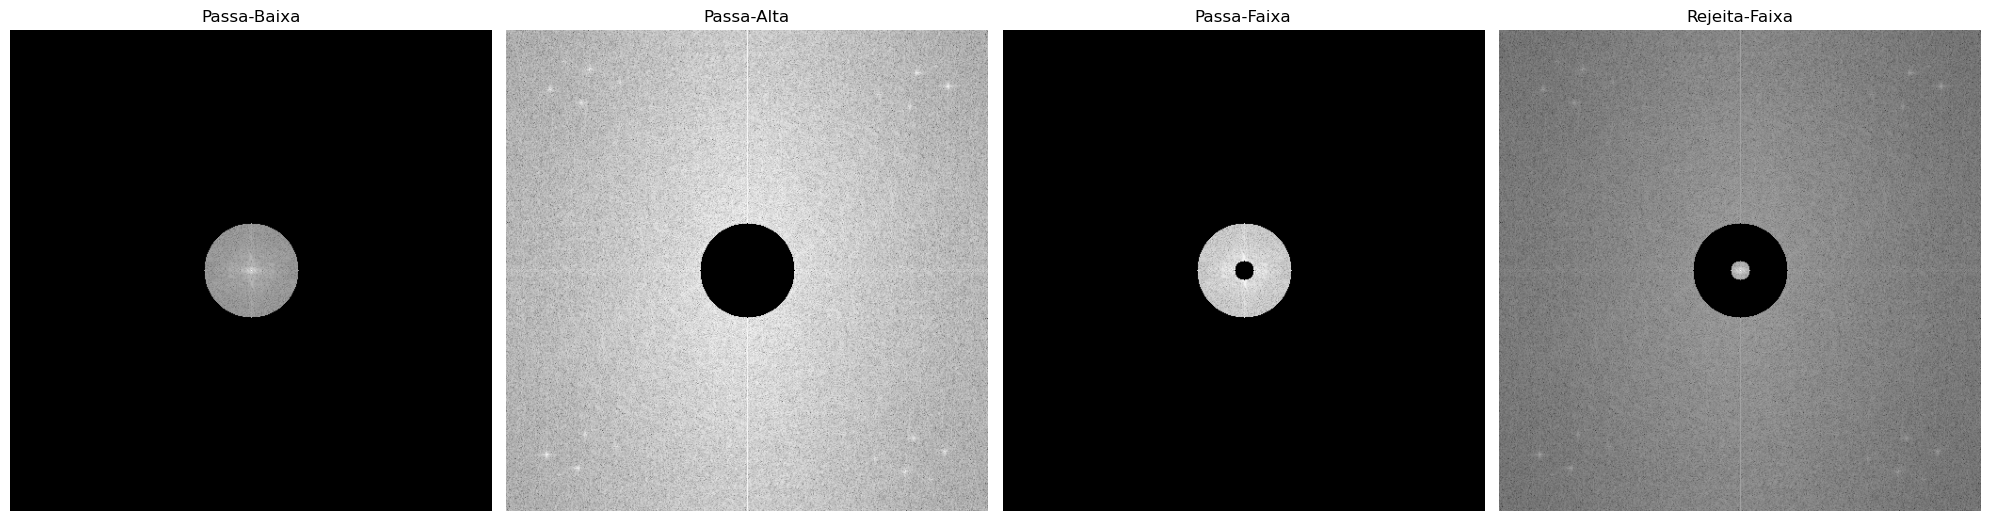

In [5]:
# Aplicação dos filtros nas imagens
imagemPassaBaixa = np.multiply(imagemEspectroFourier, mascaraPassaBaixa)            # Passa-baixa
imagemPassaAlta = np.multiply(imagemEspectroFourier, mascaraPassaAlta)              # Passa-alta
imagemPassaFaixa = np.multiply(imagemEspectroFourier, mascaraPassaFaixa)            # Passa-faixa
imagemRejeitaFaixa = np.multiply(imagemEspectroFourier, mascaraRejeitaFaixa)        # Rejeita-faixa

# Visualização das imagens após aplicação dos filtros
fig, subimagem = plt.subplots(1, 4, figsize=(20, 20))
produzir_subimagem(subimagem, 1, 0, np.log(np.abs(imagemPassaBaixa)+1), 'gray', 'Passa-Baixa')
produzir_subimagem(subimagem, 1, 1, np.log(np.abs(imagemPassaAlta)+1), 'gray', 'Passa-Alta')
produzir_subimagem(subimagem, 1, 2, np.log(np.abs(imagemPassaFaixa)+1), 'gray', 'Passa-Faixa')
produzir_subimagem(subimagem, 1, 3, np.log(np.abs(imagemRejeitaFaixa)+1), 'gray', 'Rejeita-Faixa')
fig.tight_layout()
plt.show()

Por fim, para visualizar o resultado após a aplicação dos filtros na imagem é necessário aplicar o processo inverso da trasformada de Fourier. A seguir segue os efeitos obtidos, no caso do passa-baixa é observado uma suavização das bordas juntamente com o borramento na imagem, já no passa-alta é observado um realce nas linhas e bordas do babuíno. É interesse observar os efeitos que ocorrem ao mudar o raio dos círculos nas células anteriores e como isso aumenta ou diminui o efeito desejado na imagem, cujo efeito desejado dependerá da aplicação.

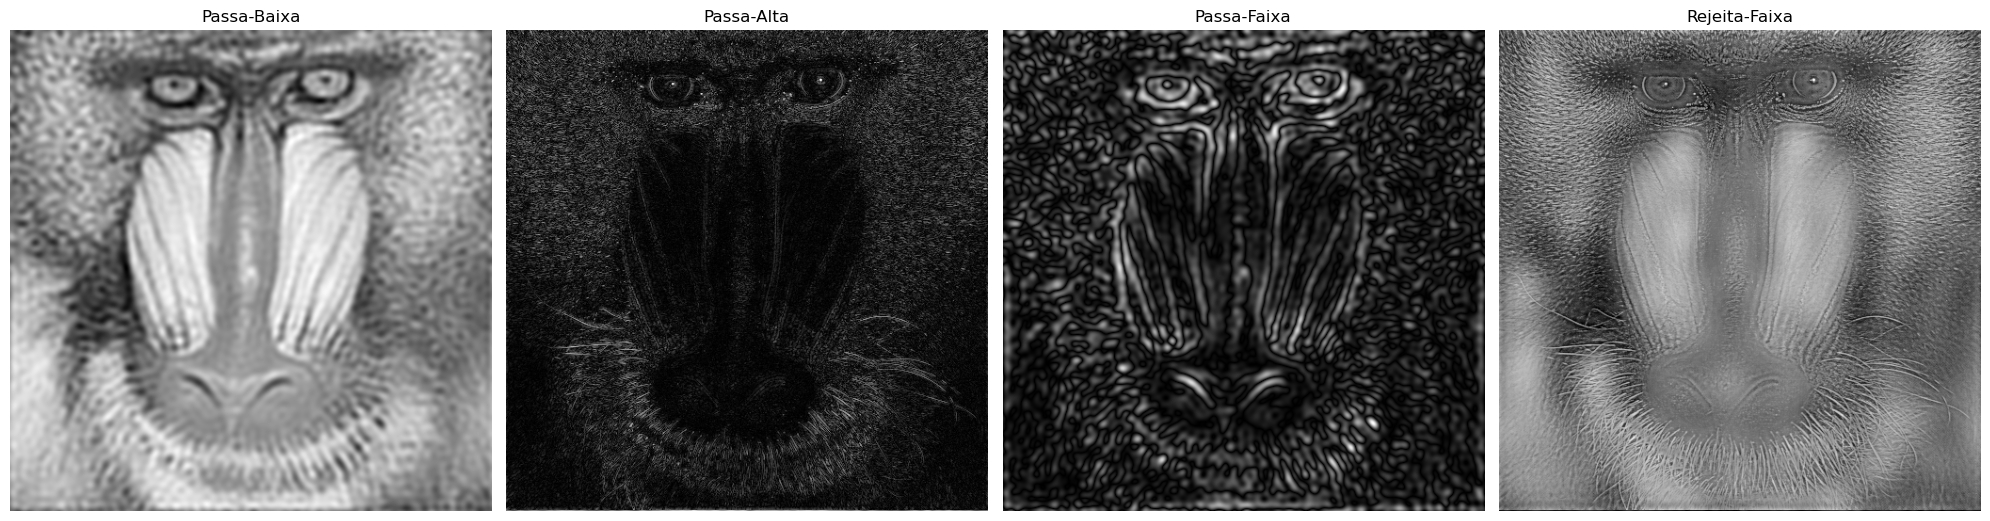

In [6]:
# Aplicação da inversa de Fourier nas imagens filtradas 
imagemInversaPassaBaixa = np.abs(np.fft.ifft2(np.fft.ifftshift(imagemPassaBaixa)))
imagemInversaPassaAlta = np.abs(np.fft.ifft2(np.fft.ifftshift(imagemPassaAlta)))
imagemInversaPassaFaixa = np.abs(np.fft.ifft2(np.fft.ifftshift(imagemPassaFaixa)))
imagemInversaRejeitaFaixa = np.abs(np.fft.ifft2(np.fft.ifftshift(imagemRejeitaFaixa)))

# Visualização das imagens após aplicação da inversa
fig, subimagem = plt.subplots(1, 4, figsize=(20, 20))
produzir_subimagem(subimagem, 1, 0, imagemInversaPassaBaixa, 'gray', 'Passa-Baixa')
produzir_subimagem(subimagem, 1, 1, imagemInversaPassaAlta, 'gray', 'Passa-Alta')
produzir_subimagem(subimagem, 1, 2, imagemInversaPassaFaixa, 'gray', 'Passa-Faixa')
produzir_subimagem(subimagem, 1, 3, imagemInversaRejeitaFaixa, 'gray', 'Rejeita-Faixa')
fig.tight_layout()
plt.show()

### Compressão da Imagem

Imagens digitais podem necessitar de grande espaço de armazenamento e largura de banda para transimissão dos dados. A técnica de compressão consiste em reduzir a quantidade de dados necessária para representar uma imagem digital, preservando a informação contida. Como o objetivo do trabalho é explorar o domínio de frequência, a compressão será realizada por um limiar que irá zerar os valores que estiverem abaixo. Este modelo de compressão não diminuirá a quantidade de bits da imagem, contudo é possível observar os histogramas das imagens antes e após a compressão e perceber a mudança ocorrida após a aplicação desta técnica.

A realização deste procedimento inicia-se com uma conversão inicial da imagem no domínio espacial para o domínio de frequência. Em seguida é definido o limiar que será utilizado. Por fim, basta percorrer toda a imagem no espectro de Fourier, lembrando de extrair o módulo uma vez que este domínio é composto por valores complexos, e para todos os coeficientes menores que tal limiar são zerados. O resultado pode ser visualizado através da aplicação da transformada inversa seguida da plotagem das imagens e dos histogramas respectivos. 

Quanto maior o limiar escolhido, mais informação será perdida na imagem e, por consequência, menos informação terá no histograma. O inverso também é válido.

<function matplotlib.pyplot.show(close=None, block=None)>

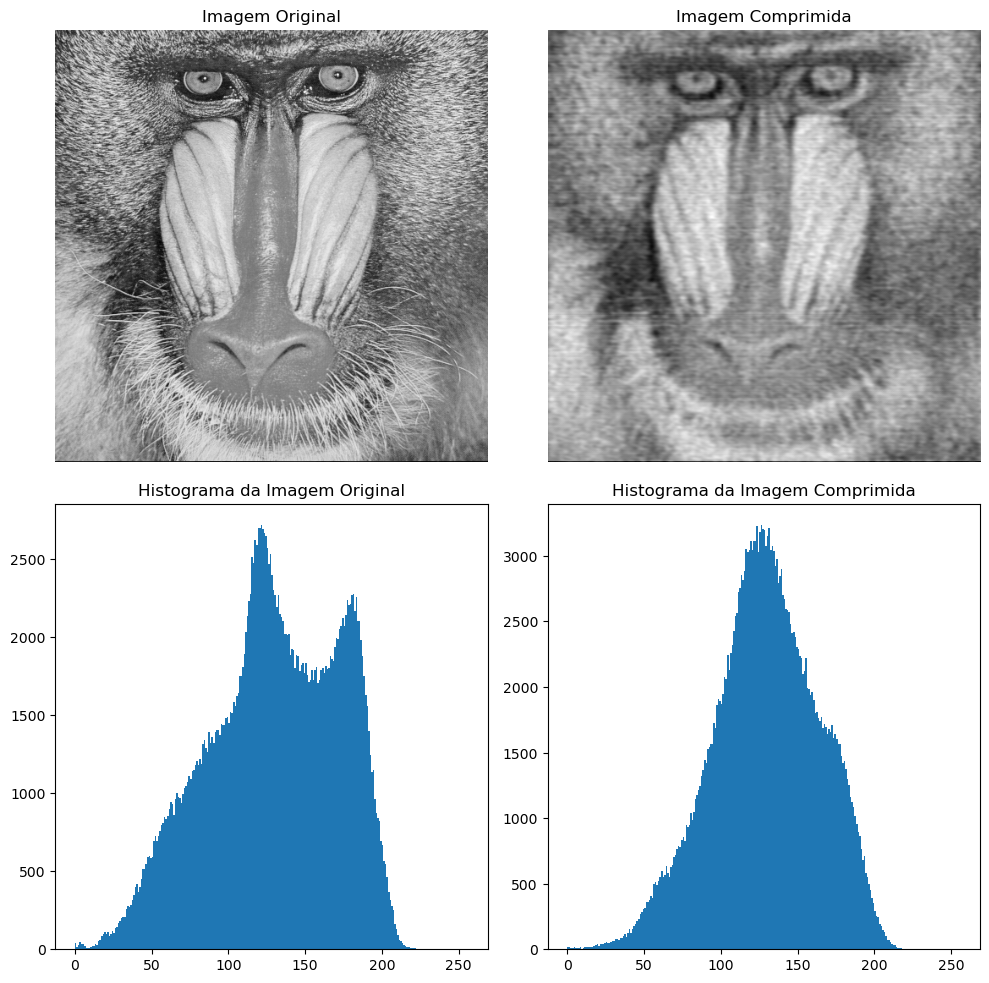

In [7]:
# Aplicar a FFT na imagem e centralizar o espectro de frequência
imagemEspectroFourier = np.fft.fftshift(np.fft.fft2(imagem))

# Remoçao de coeficientes cujas magnitudes sao menores do que um determinado limiar (atribuindo-se valores iguais a 0 a eles)
limiar = 50000                                                                            
imagemComprimida = imagemEspectroFourier.copy()
imagemComprimida[np.abs(imagemComprimida) < limiar] = 0

# Aplicar a transformada inversa de Fourier
imagemComprimida = np.abs(np.fft.ifft2(np.fft.ifftshift(imagemComprimida)))

# Visualização da imagem original e da imagem comprimida
fig, subimagem = plt.subplots(2, 2, figsize=(10, 10))
produzir_subimagem(subimagem, 0, 0, imagem, 'gray', 'Imagem Original')
produzir_subimagem(subimagem, 0, 1, imagemComprimida, 'gray','Imagem Comprimida')
# histograma
subimagem[1, 0].hist(imagem.ravel(), 256, [0, 256])
subimagem[1, 0].set_title('Histograma da Imagem Original')
subimagem[1, 1].hist(imagemComprimida.ravel(), 256, [0, 256])
subimagem[1, 1].set_title('Histograma da Imagem Comprimida')
fig.tight_layout()
plt.show